# **Exploring Musical Trends in the Dataset**

## **Objective**
This analysis explores a dataset containing information about songs. We will examine musical trends, relationships between different variables, and provide insights on artists and genres present in the dataset.

## **Main Goals**
1. Understand the distribution of musical genres.
2. Analyze the relationship between song duration and popularity.
3. Explore the influence of artists on musical trends.
4. Study the evolution of song characteristics over time.
5. Identify the most prolific artists and the most popular songs.
6. Use advanced techniques to predict song popularity.


In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "songs (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
# Overview of dataset
print(df.info())
print(df.describe())
# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    int64  
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


## Data Cleaning
Before diving into analysis, we check for missing values and handle any inconsistencies.

In [59]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as needed
df.dropna(inplace=True)

Unnamed: 0                  0
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_release_date    0
playlist_genre              0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_artist_merged         0
lyrics                      0
artist_name                 0
tags                        0
tags_tokenized              0
doc_vector                  0
combined_vector             0
cluster                     0
image_url                   0
spotify_url                 0
dtype: int64


## **Understanding the Dataset**
The dataset contains the following columns:

- `track_id`: Unique identifier for the song.
- `track_name`: The name of the song.
- `track_artist`: The main artist of the song.
- `track_popularity`: Popularity score of the song (0-100).
- `track_album_release_date`: Release date of the song.
- `playlist_genre`: The genre associated with the playlist.
- `danceability`: Measure of how suitable the song is for dancing (0-1).
- `energy`: Measure of intensity and activity of a song (0-1).
- `key`: Musical key of the song.
- `loudness`: Overall loudness of the track in dB.
- `mode`: Indicates major (1) or minor (0) mode.
- `speechiness`: Presence of spoken words in a song.
- `acousticness`: Measure of acoustic elements in the track.
- `liveness`: Likelihood of a live audience presence.
- `valence`: Musical positivity expressed by the track.
- `tempo`: BPM (beats per minute) of the track.
- `duration_ms`: Duration of the song in milliseconds.
- `artist_name`: The name of the artist.
- `tags`: Additional metadata about the song.
- `cluster`: Cluster label assigned for categorization.

Now, let's start with the first goal: analyzing the distribution of musical genres.


C:\Users\Paul\AppData\Local\Temp\ipykernel_11132\3300296907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["playlist_genre"], order=df["playlist_genre"].value_counts().index, palette="viridis")


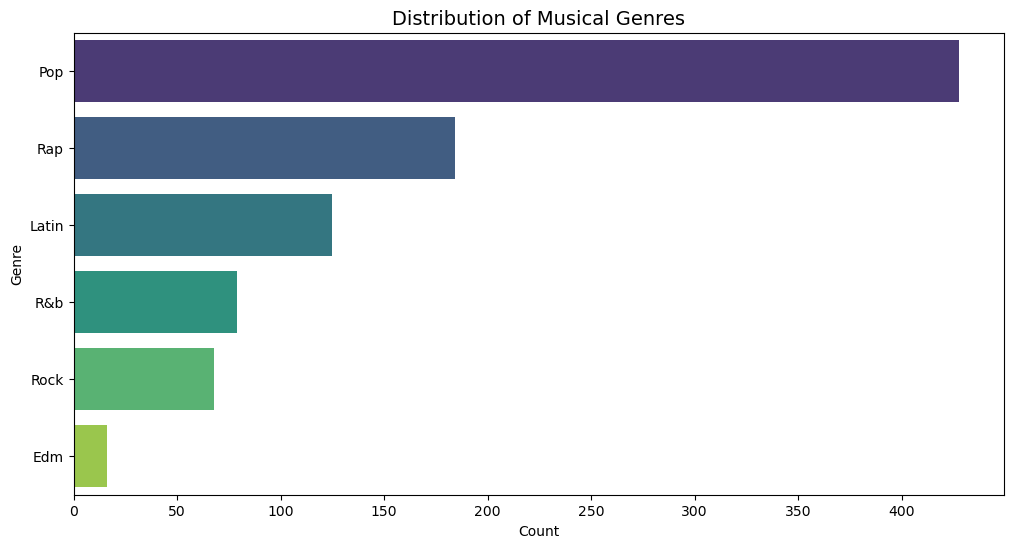

In [36]:
# **Analyzing Genre Distribution**
plt.figure(figsize=(12, 6))
sns.countplot(y=df["playlist_genre"], order=df["playlist_genre"].value_counts().index, palette="viridis")
plt.title("Distribution of Musical Genres", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


### **Analysis**
- The plot shows the distribution of different musical genres in the dataset.
- This helps us understand which genres are most represented.
- Some genres might dominate the dataset, influencing further analysis.


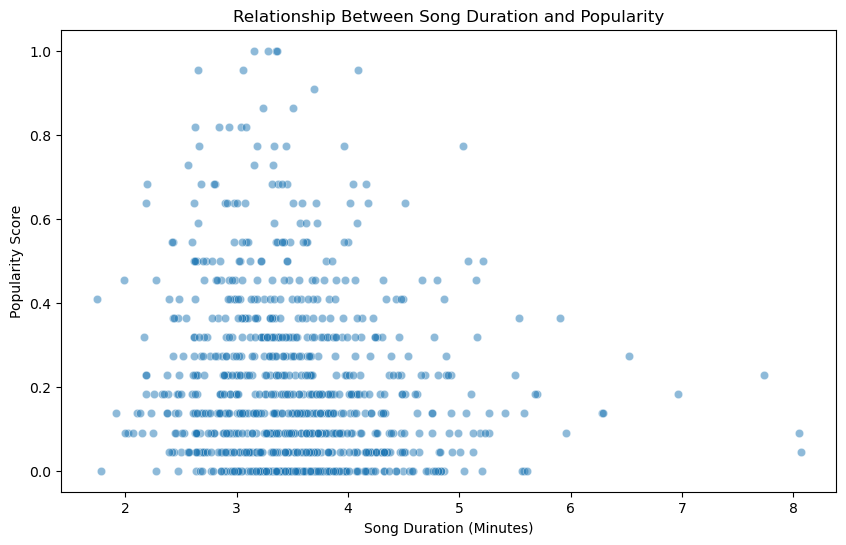

In [39]:
# **Relationship Between Song Duration and Popularity**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["duration_ms"] / 60000, y=df["track_popularity"], alpha=0.5)
plt.xlabel("Song Duration (Minutes)")
plt.ylabel("Popularity Score")
plt.title("Relationship Between Song Duration and Popularity")
plt.show()


### **Analysis**
- This scatter plot examines the correlation between song duration and popularity.
- Songs with extremely long or short durations may not be as popular.
- Checking for potential trends or outliers.


C:\Users\Paul\AppData\Local\Temp\ipykernel_11132\765919446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")


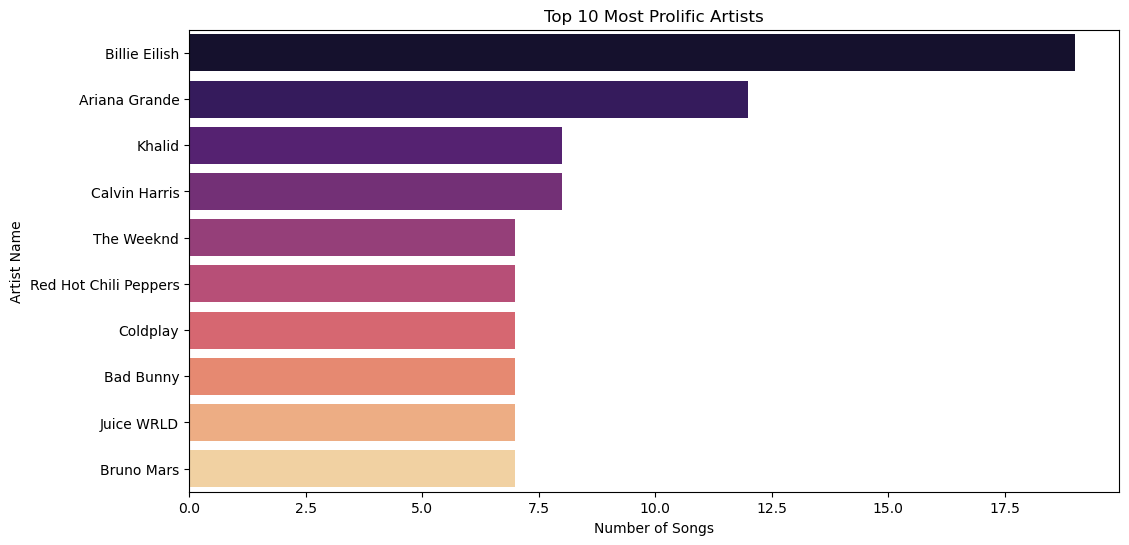

In [42]:
# **Most Prolific Artists**
top_artists = df["artist_name"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.xlabel("Number of Songs")
plt.ylabel("Artist Name")
plt.title("Top 10 Most Prolific Artists")
plt.show()


### **Analysis**
- This bar chart highlights the most prolific artists in the dataset.
- The number of songs they have in the dataset might influence overall trends.


In [45]:
# **Most Popular Songs**
top_songs = df[["track_name", "track_artist", "track_popularity"]].sort_values(by="track_popularity", ascending=False).head(10)
top_songs


,track_name,track_artist,track_popularity
429,the box,Roddyricch,1.000000
95,memories,Maroon5,1.000000
96,blinding lights,Theweeknd,1.000000
77,tusa,Karolg,1.000000
388,falling,Trevordaniel,0.954545
154,don't start now,Dualipa,0.954545
79,everything i wanted,Billieeilish,0.954545
21,ritmo (bad boys for life),Theblackeyedpeas,0.909091
82,yummy,Justinbieber,0.863636
52,bad guy,Billieeilish,0.863636


### **Analysis**
- This table shows the most popular songs based on their popularity score.
- Helps in identifying trends in song characteristics.


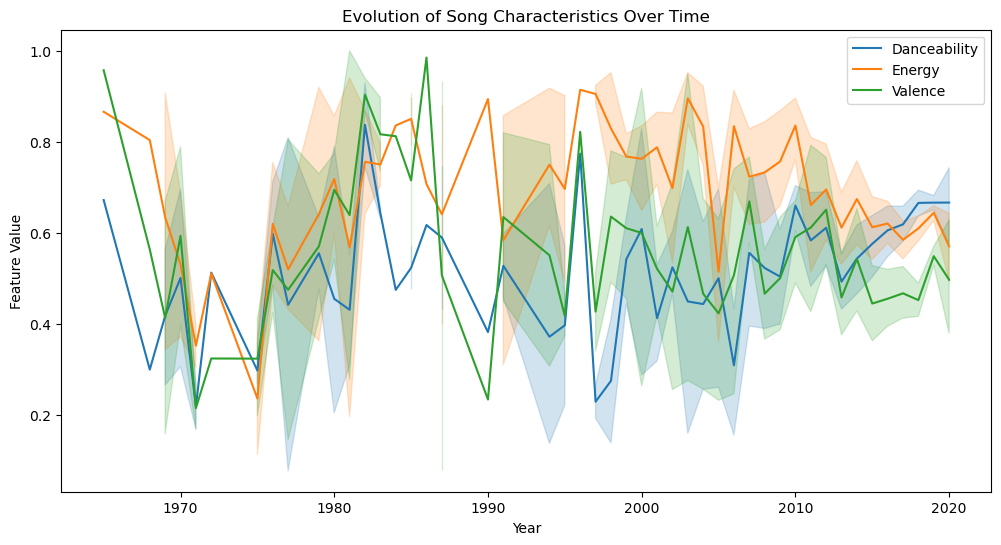

In [48]:
# **Evolution of Song Characteristics Over Time**
df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")
df["release_year"] = df["track_album_release_date"].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["release_year"], y=df["danceability"], label="Danceability")
sns.lineplot(x=df["release_year"], y=df["energy"], label="Energy")
sns.lineplot(x=df["release_year"], y=df["valence"], label="Valence")
plt.title("Evolution of Song Characteristics Over Time")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.legend()
plt.show()


### **Analysis**
- This plot shows how different song characteristics have evolved over time.
- Are songs becoming more danceable? More energetic? Happier?


In [51]:
# **Predicting Song Popularity**
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Selecting relevant features
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]
X = df[features].dropna()
y = df["track_popularity"].loc[X.index]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.15


### **Analysis**
- We trained a Random Forest model to predict song popularity.
- The Mean Absolute Error (MAE) gives us an idea of the model's accuracy.
- Further tuning and feature engineering may improve predictions.


## **Heatmap of Feature Correlations**
A heatmap helps us see relationships between different numerical features in the dataset. This can help us understand which factors influence song popularity.


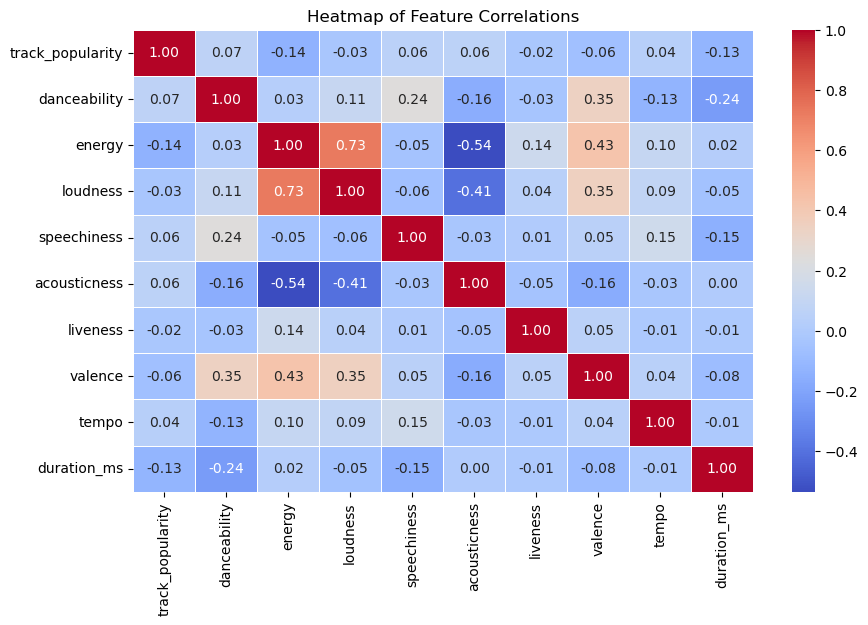

In [62]:
# **Heatmap of Correlations**
import numpy as np

# Selecting numerical columns
numerical_cols = ["track_popularity", "danceability", "energy", "loudness", 
                  "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


### **Analysis**
- The heatmap shows how different features are related to each other.
- Dark red indicates a strong positive correlation, while dark blue means a strong negative correlation.
- We can check if features like `danceability` or `energy` are linked to `track_popularity`.
